In [6]:
import pandas as pd
import numpy as np

bu = pd.read_csv('Downloads/부산부동산17.csv')
bu

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
0,부산광역시 강서구 녹산동,262-1,262,1,유나베네스1차,72.5242,201710,1,20500,6,2017,화전산업대로 272-9
1,부산광역시 강서구 녹산동,262-1,262,1,유나베네스1차,72.5242,201710,2,20500,3,2017,화전산업대로 272-9
2,부산광역시 강서구 녹산동,262-1,262,1,유나베네스1차,62.2475,201710,24,19000,5,2017,화전산업대로 272-9
3,부산광역시 강서구 녹산동,262-1,262,1,유나베네스1차,62.2475,201710,25,18800,2,2017,화전산업대로 272-9
4,부산광역시 강서구 녹산동,262-1,262,1,유나베네스1차,72.5242,201710,26,20800,2,2017,화전산업대로 272-9
...,...,...,...,...,...,...,...,...,...,...,...,...
99739,부산광역시 해운대구 중동,1533-1,1533,1,현우산호맨션,51.3000,201903,9,12000,2,1987,달맞이길117번나길 194
99740,부산광역시 해운대구 중동,1533-1,1533,1,현우산호맨션,51.3000,201909,2,10000,5,1987,달맞이길117번나길 194
99741,부산광역시 해운대구 중동,1533-1,1533,1,현우산호맨션,44.2200,201910,5,12000,3,1987,달맞이길117번나길 194
99742,부산광역시 해운대구 중동,1516-5,1516,5,협진태양,59.9000,201911,9,22700,13,1995,달맞이길65번길 15


In [8]:
AA = bu[['거래금액(만원)', '건축년도']]      #데이터프레임 자르기
AA

,거래금액(만원),건축년도
0,20500,2017
1,20500,2017
2,19000,2017
3,18800,2017
4,20800,2017
...,...,...
99739,12000,1987
99740,10000,1987
99741,12000,1987
99742,22700,1995


In [9]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

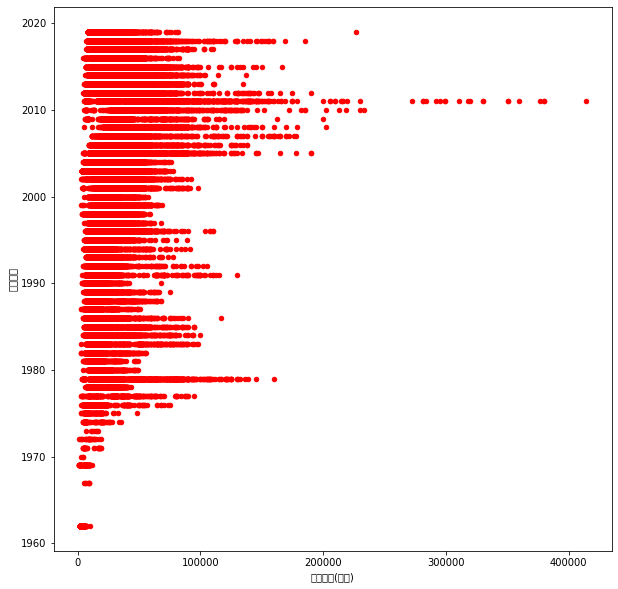

In [12]:
AA.plot(kind="scatter", x='거래금액(만원)',y='건축년도',figsize=(10,10), color="red")

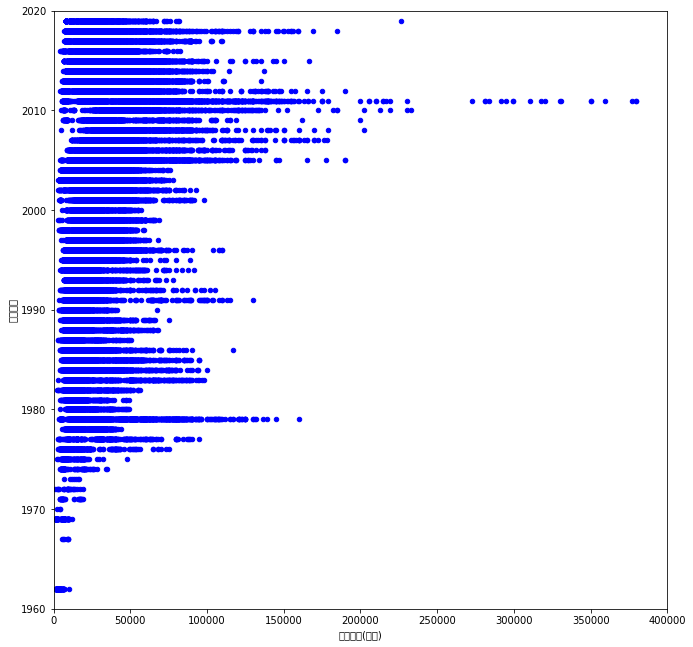

In [13]:
AA.plot(kind="scatter", x="거래금액(만원)", y="건축년도", figsize=(11,11),
                color="blue", xlim = (0,400000), ylim = (1960,2020))

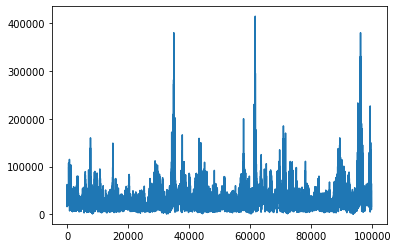

In [21]:
value = AA['거래금액(만원)']
index = range(len(value))

plt.plot(index,value)

Text(0.5, 1.0, 'Price')

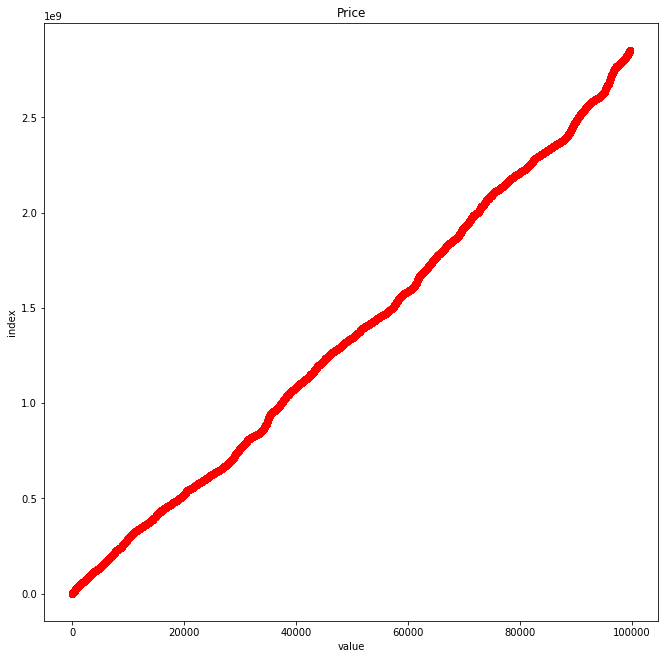

In [31]:
plt.figure(figsize=(11,11))
plt.plot(value.cumsum(), 'b' , lw =3)
plt.plot(value.cumsum(), 'ro')
plt.xlabel("value")
plt.ylabel("index")
plt.title("Price")

Text(0.5, 1.0, 'Price')

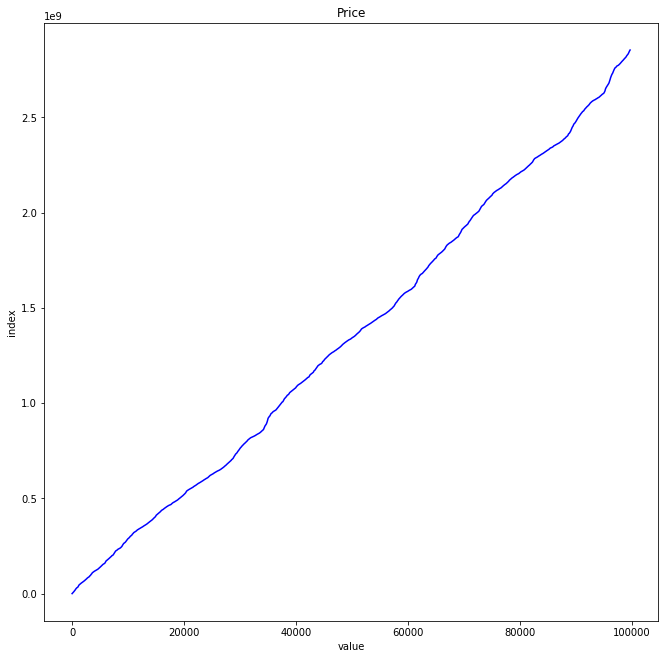

In [33]:
plt.figure(figsize=(11,11))
plt.plot(value.cumsum(), 'b' , lw =1.5)
plt.xlabel("value")
plt.ylabel("index")
plt.title("Price")

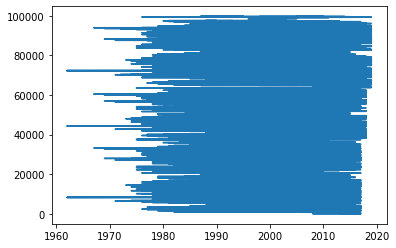

In [18]:
year = AA['건축년도']
index = range(len(value))

plt.plot(year,index)

Text(0.5, 1.0, 'Price')

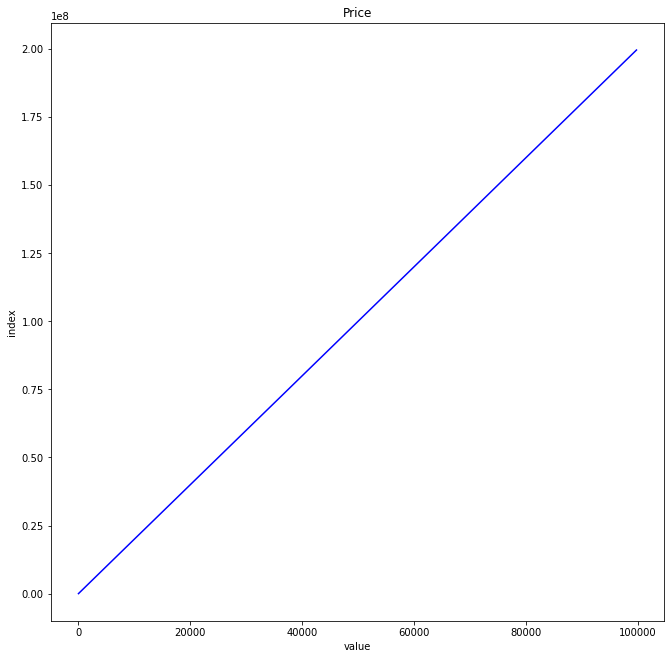

In [34]:
plt.figure(figsize=(11,11))
plt.plot(year.cumsum(), 'b' , lw =1.5)
plt.xlabel("value")
plt.ylabel("index")
plt.title("Price")

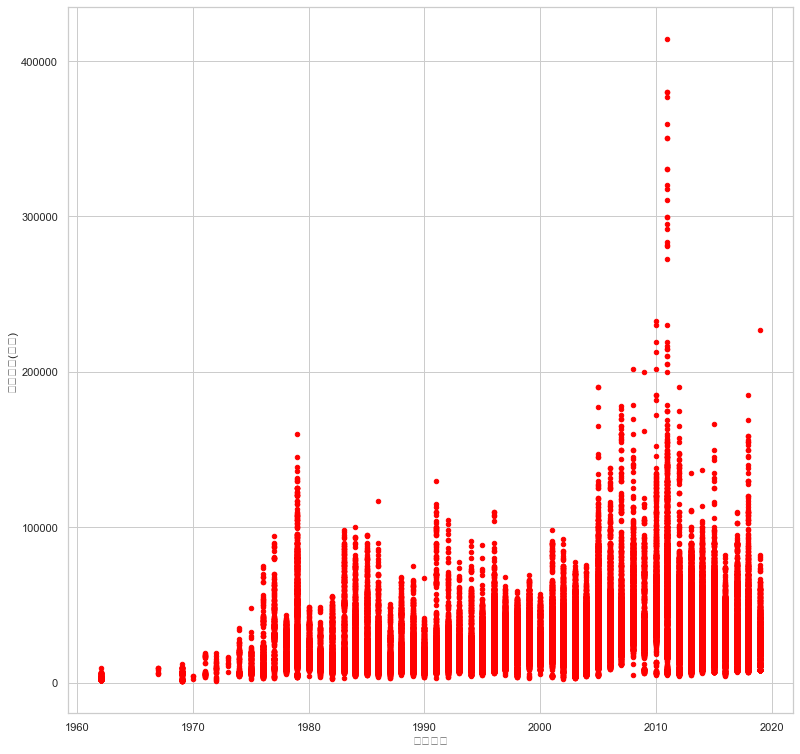

In [44]:
AA.plot(kind="scatter", y='거래금액(만원)',x='건축년도',figsize=(13,13), color="red")      # 건축년도랑 거래금액

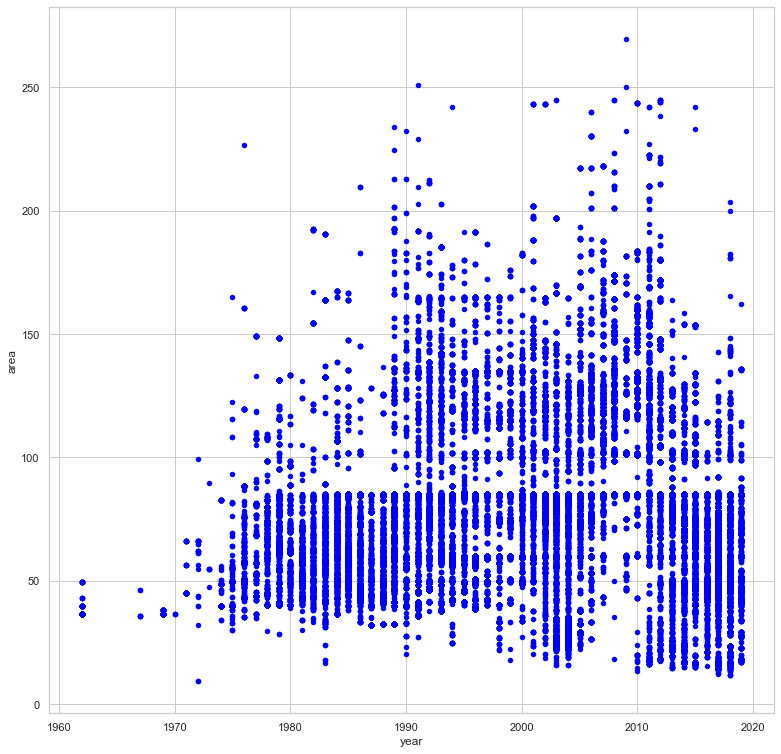

In [47]:
CC.plot(kind="scatter", y='area',x='year',figsize=(13,13), color="blue")       # 건축연도랑 면적

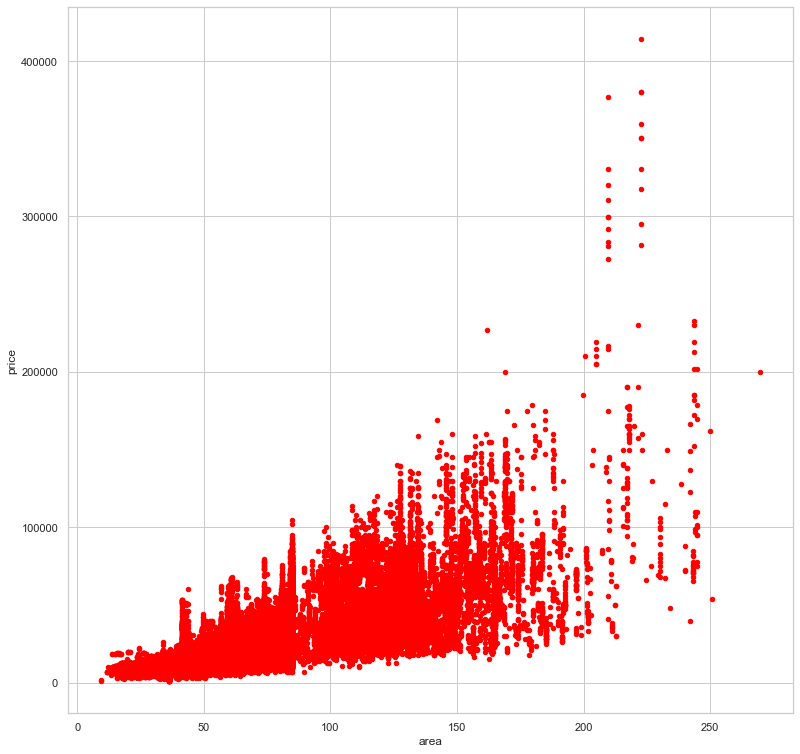

In [45]:
BB.plot(kind="scatter", y='price',x='area',figsize=(13,13), color="red")      # 면적과 거래금액

In [46]:
CC = bu[['건축년도', '전용면적(㎡)']]
CC = CC.rename(columns={'건축년도':'year' , '전용면적(㎡)':'area'})     # 컬럼 변경하기
print(CC)

       year     area
0      2017  72.5242
1      2017  72.5242
2      2017  62.2475
3      2017  62.2475
4      2017  72.5242
...     ...      ...
99739  1987  51.3000
99740  1987  51.3000
99741  1987  44.2200
99742  1995  59.9000
99743  1995  59.9000

[99744 rows x 2 columns]


In [41]:
BB = bu[['거래금액(만원)', '전용면적(㎡)']]
BB = BB.rename(columns={'거래금액(만원)':'price' , '전용면적(㎡)':'area'})     # 컬럼 변경하기
print(BB)

       price     area
0      20500  72.5242
1      20500  72.5242
2      19000  62.2475
3      18800  62.2475
4      20800  72.5242
...      ...      ...
99739  12000  51.3000
99740  10000  51.3000
99741  12000  44.2200
99742  22700  59.9000
99743  17000  59.9000

[99744 rows x 2 columns]


# 면적과 거래금액의 선형회귀

In [49]:
from sklearn import linear_model

In [51]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(BB["area"]), y = BB["price"])
prediction = linear_regression.predict(X = pd.DataFrame(BB["area"]))

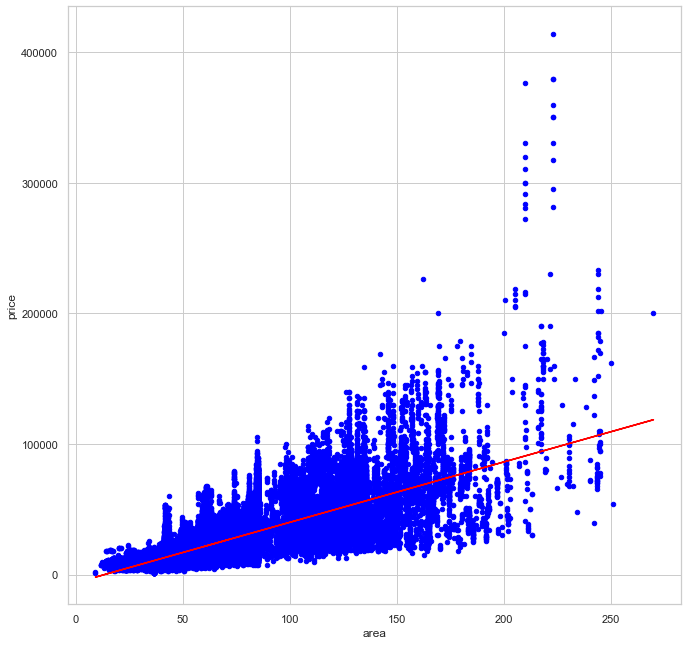

In [53]:
BB.plot(kind="scatter",x="area",y="price",figsize=(11,11),
                color="blue")

plt.plot(BB["area"],prediction,color="red")